### Code-Zusammenfassung

Der folgende Code führt verschiedene Operationen im Zusammenhang mit maschinellem Lernen und Datenanalysen durch.

#### Imports

<span style="font-family: Arial; font-size: 11pt;">

Der Code importiert die folgenden Bibliotheken:

- psycopg2: Eine Bibliothek zur Verbindung mit einer PostgreSQL-Datenbank.
- pandas: Eine Bibliothek zur Datenmanipulation und -analyse.
- matplotlib.pyplot: Eine Bibliothek zur Visualisierung von Daten mit Diagrammen.
- sklearn.model_selection.train_test_split: Eine Funktion zum Aufteilen von Daten in Trainings- und Testsets.
- sklearn.model_selection.GridSearchCV: Eine Funktion zur Durchführung einer Gitter-Suchlauf-Validierung für die Modellparameteroptimierung.
- sklearn.ensemble.RandomForestClassifier: Ein Modellalgorithmus für Klassifikationen basierend auf Entscheidungsbäumen.
- sklearn.metrics.accuracy_score: Eine Funktion zur Berechnung der Genauigkeit eines Klassifikationsmodells.
- sklearn.metrics.classification_report: Eine Funktion zur Bereitstellung eines umfassenden Berichts über die Leistung eines Klassifikationsmodells.
- sklearn.metrics.confusion_matrix: Eine Funktion zur Berechnung der Konfusionsmatrix eines Klassifikationsmodells.
- tensorflow.keras.models.Sequential: Eine Klasse für den Aufbau von sequenziellen Modellen in Keras.
- tensorflow.keras.layers.Dense: Eine Klasse für vollständig verbundene Schichten in einem Keras-Modell.

#### Weitere Code-Operationen

Der Code führt auch weitere Operationen durch, die nicht explizit importierte Bibliotheken erfordern. Diese Operationen können Daten laden, Modelltraining und -evaluation durchführen, Visualisierungen erstellen usw. Der genaue Inhalt dieser Operationen kann im Code selbst gefunden werden.
</span>

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Verbindung zur Datenbank herstellen

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="PSQL_ADSFS2023Gruppe15",
    user="ADSFS2023Gruppe15",
    password="ADS_FS_2023_G15!?"
)


#### SQL Queries für die DB Abfrage
#### Anschliessend die Daten aus den DB Tabellen lesen und in Dataframes speichern

In [3]:
query_tabelle = "SELECT team_id, mannschaft, punkte, tore FROM bundesliga_mannschaften"
query_resultate = "SELECT matchday, id_teamh, id_teamg, tore_teamh, tore_teamg, winner_team_id FROM bundesliga_resultate"
query_shots_stats = "SELECT matchday, team_id, shots_total FROM bundesliga_shots_stats"
query_duel_stats = "SELECT matchday, team_id, duels_total, duels_won FROM bundesliga_duels_stats"
query_pass_stats = "SELECT matchday, team_id, pass_complete, pass_failed, pass_total, pass_percentage FROM bundesliga_pass_stats"
query_corner_stats = "SELECT matchday, team_id, corner_left, corner_right, corner_total FROM bundesliga_corners"
query_distance_stats = "SELECT matchday, team_id, distance_total FROM bundesliga_distance_stats"
query_freekicks_stats = "SELECT matchday, team_id, freekicks_total FROM bundesliga_freekicks"
query_touch_stats = "SELECT matchday, team_id, touches_total FROM bundesliga_touch_stats"

df_tabelle = pd.read_sql(query_tabelle, conn)
df_resultate = pd.read_sql(query_resultate, conn)
df_shots = pd.read_sql(query_shots_stats, conn)
df_duels = pd.read_sql(query_duel_stats, conn)
df_pass = pd.read_sql(query_pass_stats, conn)
df_corner = pd.read_sql(query_corner_stats, conn)
df_distance = pd.read_sql(query_distance_stats, conn)
df_freekicks = pd.read_sql(query_freekicks_stats, conn)
df_touch = pd.read_sql(query_touch_stats, conn)

C:\Users\Renzo\AppData\Local\Temp\ipykernel_24280\2633563593.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tabelle = pd.read_sql(query_tabelle, conn)
C:\Users\Renzo\AppData\Local\Temp\ipykernel_24280\2633563593.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_resultate = pd.read_sql(query_resultate, conn)
C:\Users\Renzo\AppData\Local\Temp\ipykernel_24280\2633563593.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shots = pd.read_sql(query_shots_stats, conn)
C:\Users\Renzo\AppData\Local\Temp\ipykernel

#### Zusammenfassen aller Dataframes in ein einziges Dataframe

<span style="font-family: Arial; font-size: 11pt;">

Dies wird anhand der team_id gemacht, die in jeder Tabelle vorhanden ist und als identifikator alles Teams gilt

</span>

In [4]:
merged_df = pd.merge(df_resultate[['matchday', 'id_teamh', 'id_teamg', 'tore_teamh', 'tore_teamg', 'winner_team_id']],
                     df_tabelle, left_on='id_teamh', right_on='team_id')
merged_df = pd.merge(merged_df, df_tabelle, left_on='id_teamg', right_on='team_id', suffixes=('_home', '_guest'))
merged_df = pd.merge(merged_df, df_shots, left_on=['id_teamh', 'matchday'], right_on=['team_id', 'matchday'])
merged_df = pd.merge(merged_df, df_shots, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
merged_df = pd.merge(merged_df, df_duels, left_on=['id_teamh', 'matchday'], right_on=['team_id', 'matchday'])
merged_df = pd.merge(merged_df, df_duels, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
merged_df = pd.merge(merged_df, df_pass, left_on=['id_teamh', 'matchday'], right_on=['team_id', 'matchday'])
merged_df = pd.merge(merged_df, df_pass, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
merged_df = pd.merge(merged_df, df_corner, left_on=['id_teamh', 'matchday'], right_on=['team_id', 'matchday'])
merged_df = pd.merge(merged_df, df_corner, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
merged_df = pd.merge(merged_df, df_distance, left_on=['id_teamh', 'matchday'], right_on=['team_id', 'matchday'])
merged_df = pd.merge(merged_df, df_distance, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
merged_df = pd.merge(merged_df, df_freekicks, left_on=['id_teamh', 'matchday'], right_on=['team_id', 'matchday'])
merged_df = pd.merge(merged_df, df_freekicks, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
merged_df = pd.merge(merged_df, df_touch, left_on=['id_teamh', 'matchday'], right_on=['team_id', 'matchday'])
merged_df = pd.merge(merged_df, df_touch, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))

#print(merged_df.head())

C:\Users\Renzo\AppData\Local\Temp\ipykernel_24280\4006094798.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'team_id_home'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df_shots, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
C:\Users\Renzo\AppData\Local\Temp\ipykernel_24280\4006094798.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'team_id_home'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df_duels, left_on=['id_teamg', 'matchday'], right_on=['team_id', 'matchday'], suffixes=('_home', '_guest'))
C:\Users\Renzo\AppData\Local\Temp\ipykernel_24280\4006094798.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'team_id_home'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df_pass

#### Definition der Merkmale

<span style="font-family: Arial; font-size: 11pt;">

Definition von Merkmalen aus dem Datensetz die für das machinelle lernen benötigt werden. Die Merkmale dienen als Eingabevariable für das Lernmodell.
Am Schluss wird das Merkmal definiert, das als Ausgabevariable dient.


</span>

In [5]:
X = merged_df[['punkte_home', 'punkte_guest', 'tore_home', 'tore_guest',
               'shots_total_home', 'shots_total_guest', 'duels_total_home', 'duels_total_guest',
               'duels_won_home', 'duels_won_guest', 'pass_complete_home', 'pass_complete_guest',
               'pass_failed_home', 'pass_failed_guest', 'pass_total_home', 'pass_total_guest',
               'pass_percentage_home', 'pass_percentage_guest', 'corner_left_home','corner_left_guest',
               'corner_right_home', 'corner_right_guest', 'corner_total_home', 'corner_total_guest',
               'distance_total_home', 'distance_total_guest', 'freekicks_total_home', 'freekicks_total_guest',
               'touches_total_home', 'touches_total_guest']]
y = merged_df['winner_team_id']

#### Vorverarbeitung von Daten und Erstellen von Feature-Matrix und Zielvektor

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt ist mit der Vorverarbeitung der Daten und der Vorbereitung von Eingabe- und Ausgabedaten für ein maschinelles Lernmodell beschäftigt.

1. Zuerst werden mit der Methode `get_dummies` neue Spalten für jede Kategorie in den Spalten 'mannschaft_home' und 'mannschaft_guest' erzeugt. Dies transformiert kategoriale Variablen in ein Format, das für maschinelles Lernen geeignet ist, indem es sogenannte Dummy-Variablen erstellt. Jedes Team der Bundesliga wird hierbei als Heim- und Gastmannschaft berücksichtigt.
2. Anschliessend werden doppelte oder unnötige Spalten aus dem DataFrame entfernt, die durch vorheriges Zusammenführen von DataFrames entstanden sind.
3. Schliesslich wird die Feature-Matrix `X` erstellt, indem die Spalte 'winner_team_id' aus dem DataFrame entfernt wird, und der Zielvektor `y` wird erstellt, indem nur die Spalte 'winner_team_id' ausgewählt wird.


</span>

In [6]:
# Erzeugen von neuen Spalten die das Lernmodell benötigt. Für jede neue Kategorie wird hier eine neue Spalte erstellt
# In diesem Fall für jedes Team, welches in der Bundesliga mitmacht wird eine neue Spate erzeugt (1x als Heim und 1x als Gast Mannschaft)
merged_df_dummies = pd.get_dummies(merged_df, columns=['mannschaft_home', 'mannschaft_guest'])

# Durch das zusammenführen der Dataframes in einem vorgehenden Schritt werden einige Spalten doppelt aufgeführt. 
# Da diese unnötig sind werden sie hier entfernt
merged_df_dummies.drop(['id_teamh', 'id_teamg', 'matchday', 'team_id_home', 'team_id_guest', 'duels_total_home', 'duels_total_guest'], axis=1, inplace=True)


# Create feature matrix X and target vector y
X = merged_df_dummies.drop(['winner_team_id'], axis=1)
y = merged_df_dummies[['winner_team_id']]

#### Aufteilung der Daten, Modelltraining und Vorhersage

<span style="font-family: Arial; font-size: 11pt;">

In diesem Codeabschnitt wird ein Klassifikationsmodell erstellt, trainiert und getestet.

1. Zuerst werden die Daten in Trainings- und Testdatensätze aufgeteilt, wobei 70% der Daten zum Training und 30% zum Testen verwendet werden.
2. Dann wird ein `RandomForestClassifier`-Modell erstellt und mit den Trainingsdaten trainiert.
3. Schliesslich wird das trainierte Modell verwendet, um Vorhersagen auf den Testdatensatz zu machen.

Dieser Codeabschnitt demonstriert die typischen Schritte beim Erstellen und Anwenden eines maschinellen Lernmodells, einschliesslich Datenaufteilung, Modelltraining und Vorhersage.


</span>

In [7]:
# Daten werden in Trainings und Test Daten aufgeteilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model wird trainiert
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Eine Vorhersage basierend auf den Testdaten machen
y_pred = model.predict(X_test)


C:\Users\Renzo\AppData\Local\Temp\ipykernel_24280\3812772976.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


#### Hyperparameter-Tuning / Berechnung und Ausgabe der Modellgenauigkeit

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt ist dafür verantwortlich, die Genauigkeit des trainierten Modells zu berechnen und auszugeben.

1. Die Funktion `accuracy_score` aus der Bibliothek `sklearn.metrics` wird verwendet, um die Genauigkeit des Modells zu berechnen. Dies geschieht durch Vergleich der tatsächlichen Zielwerte im Testdatensatz (`y_test`) mit den vom Modell vorhergesagten Werten (`y_pred`).
2. Die berechnete Genauigkeit wird dann als Fliesskommazahl mit zwei Nachkommastellen ausgegeben.

Dieser Codeabschnitt stellt eine typische Methode dar, um die Leistung eines Klassifikationsmodells zu bewerten.

</span>

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.41


#### Hyperparameter-Tuning des Modells mit GridSearchCV

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt beschäftigt sich mit der Verbesserung der Leistung des Modells durch Hyperparameter-Tuning. Dafür wird `GridSearchCV` aus Scikit-Learn verwendet, eine Methode, die eine systematische Exploration einer Vielzahl möglicher Hyperparameterwerte ermöglicht.

In beiden Versionen wird folgendermassen vorgegangen:

1. Zuerst wird ein Raster (Grid) von Hyperparametern erstellt, das wir ausprobieren möchten. Dazu gehören die Anzahl der Schätzer (`n_estimators`), die maximale Tiefe (`max_depth`), die minimale Anzahl von Stichproben, um einen internen Knoten zu teilen (`min_samples_split`), und die minimale Anzahl von Stichproben, die an einem Blattknoten benötigt werden (`min_samples_leaf`).
2. Dann wird `GridSearchCV` initialisiert mit dem Modell als Schätzer und dem Hyperparameter-Raster. `cv=3` legt fest, dass eine 3-fache Kreuzvalidierung durchgeführt wird, und `n_jobs=-1` ermöglicht es, alle Prozessoren zu verwenden.
3. `GridSearchCV` wird dann auf den Trainingsdaten ausgeführt, um die beste Kombination von Hyperparametern zu finden.
4. Schliesslich werden die besten gefundenen Parameter ausgegeben.

In der Version 2 wird das `RandomForestClassifier` Modell erneut initialisiert, was den Code klarer macht, aber nicht notwendig ist, da das Modell bereits oben definiert wurde.

Diese Codeblöcke zeigen den Prozess des Hyperparameter-Tunings, um die Leistung eines RandomForestClassifier-Modells zu optimieren.


</span>

In [9]:
###### VERSION 1 ######
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

###### VERSION 2 ######
# Das Modell, das wir optimieren wollen
model = RandomForestClassifier(random_state=42)

# Die Hyperparameter, die wir ausprobieren möchten
param_grid = {
    'n_estimators': [100, 200, 300, 500],   # Anzahl der Bäume
    'max_depth': [None, 10, 20, 30],         # Maximale Tiefe der Bäume
    'min_samples_split': [2, 5, 10],         # Minimale Anzahl von Samples, um einen internen Knoten zu teilen
    'min_samples_leaf': [1, 2, 4]            # Minimale Anzahl von Samples, die an einem Blattknoten benötigt werden
}

c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}


#### Durchführung von Hyperparameter-Tuning mittels GridSearchCV

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt führt das Hyperparameter-Tuning durch.

1. Zuerst wird eine Instanz von `GridSearchCV` initialisiert. Hierbei wird das `RandomForestClassifier` Modell als Schätzer verwendet, und das zuvor definierte Hyperparameter-Raster wird übergeben. `cv=3` legt fest, dass eine 3-fache Kreuzvalidierung durchgeführt wird, und `n_jobs=-1` erlaubt die Verwendung aller verfügbaren Prozessoren.
2. Dann wird `GridSearchCV` mit den Trainingsdaten gefüttert. Dabei wird `.values.ravel()` auf `y_train` angewendet, um eine eindimensionale Darstellung des Zielvektors zu gewährleisten, was häufig für Scikit-Learn Modelle erforderlich ist.

Dieser Codeabschnitt stellt die Durchführung des Hyperparameter-Tunings mittels `GridSearchCV` dar, ein zentraler Schritt zur Optimierung der Leistung von maschinellen Lernmodellen.

</span>

In [10]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]})

#### Ausgabe der besten Parameter

In [11]:
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


#### Auswahl des besten Modells aus dem Hyperparameter-Tuning

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt dient dazu, das Modell mit der besten Leistung aus dem durchgeführten Hyperparameter-Tuning zu ermitteln.

1. Die Methode `best_estimator_` von `GridSearchCV` wird verwendet, um das Modell mit den besten Hyperparametern zu extrahieren. Dieses Modell wird dann in der Variable `best_model` gespeichert.

Dieser Codeabschnitt zeigt, wie man das beste Modell aus einem Hyperparameter-Tuning-Prozess mittels `GridSearchCV` ermittelt.

</span>

In [12]:
best_model = grid_search.best_estimator_

#### Vorhersage und Leistungsbewertung des besten Modells

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt macht Vorhersagen mit dem besten Modell aus dem Hyperparameter-Tuning und bewertet dessen Leistung.

1. Zuerst verwendet das beste Modell, das von `GridSearchCV` gefunden wurde, die `predict` Methode, um Vorhersagen auf dem Testdatensatz zu machen. Diese Vorhersagen werden in `y_pred_best` gespeichert.
2. Dann wird die Genauigkeit dieses Modells berechnet, indem `accuracy_score` verwendet wird, um die vorhergesagten Werte mit den tatsächlichen Werten zu vergleichen.
3. Schliesslich wird die berechnete Genauigkeit als Fließkommazahl mit zwei Nachkommastellen ausgegeben.

Dieser Codeabschnitt demonstriert die Anwendung und Leistungsbewertung des optimierten Modells.

</span>

In [13]:
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy of best model: {accuracy_best:.2f}')

Accuracy of best model: 0.46


#### Modellbewertung

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt behandelt die Bewertung des Modells nachdem die Vorhersagen gemacht wurden.

1. Zuerst werden Vorhersagen auf dem Testdatensatz mit dem Modell gemacht und in `y_pred` gespeichert.
2. Danach wird die Funktion `classification_report` verwendet, um einen Textbericht zu erstellen, der die wichtigsten Klassifikationsmetriken enthält. Dieser Bericht wird ausgegeben und liefert eine Zusammenfassung der Genauigkeit, der Precision, des Recall und der F1-Score für jede Klasse.
3. Anschliessend wird die Funktion `confusion_matrix` verwendet, um eine Konfusionsmatrix zu erstellen. Die Konfusionsmatrix (`cm`) gibt einen Überblick über die Anzahl der richtig und falsch klassifizierten Beobachtungen.
4. Schliesslich wird die Konfusionsmatrix mit Hilfe von Matplotlib und Seaborn als Heatmap visualisiert. Auf der X-Achse sind die vorhergesagten Klassen und auf der Y-Achse die tatsächlichen Klassen dargestellt.

Dieser Codeabschnitt zeigt, wie die Leistung eines Klassifikationsmodells bewertet und visualisiert werden kann.

</span>

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      20.0
         1.0       0.00      0.00      0.00       0.0
         6.0       0.00      0.00      0.00       1.0
         7.0       0.00      0.00      0.00       4.0
         9.0       0.00      0.00      0.00       2.0
        16.0       0.00      0.00      0.00       2.0
        40.0       0.00      0.00      0.00       7.0
        54.0       0.00      0.00      0.00       1.0
        65.0       0.00      0.00      0.00       3.0
        80.0       0.00      0.00      0.00       5.0
        81.0       0.00      0.00      0.00       5.0
        87.0       0.00      0.00      0.00       4.0
        91.0       0.00      0.00      0.00       2.0
        95.0       0.00      0.00      0.00       3.0
       112.0       0.00      0.00      0.00       4.0
       129.0       0.00      0.00      0.00       2.0
       131.0       0.00      0

c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Renzo\anaconda3\en

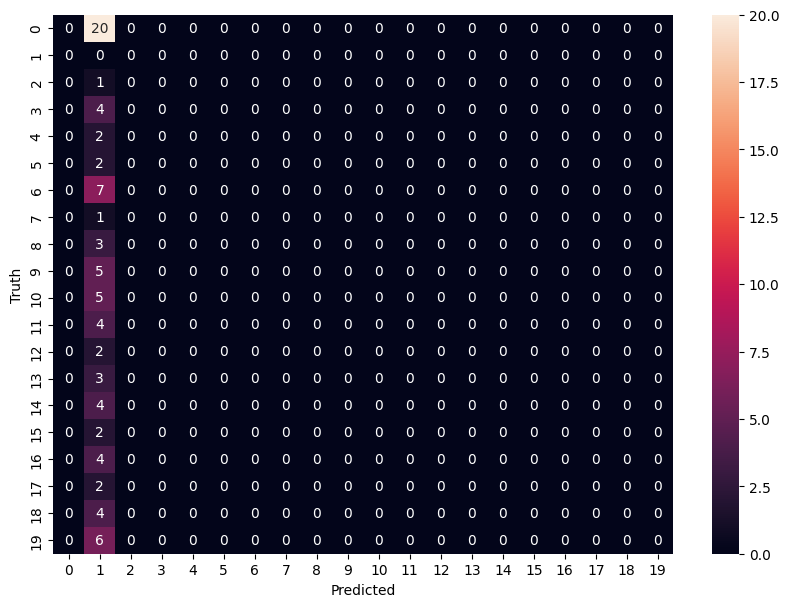

In [20]:
# Nachdem die Vorhersagen gemacht wurden:
y_pred = model.predict(X_test)

# Verwenden der Funktion classification_report, um einen Textbericht über die wichtigsten Klassifikationsmetriken zu erstellen
print(classification_report(y_test, y_pred))

# Verwenden der Funktion confusion_matrix, um eine Konfusionsmatrix zu erstellen
cm = confusion_matrix(y_test, y_pred)

# Anzeigen der Konfusionsmatrix mit Hilfe von Matplotlib
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### Durchführung einer Kreuzvalidierung

<span style="font-family: Arial; font-size: 11pt;">

Dieser Codeabschnitt führt eine Kreuzvalidierung durch, um die Robustheit des Modells zu bewerten.

1. Ein `RandomForestClassifier` Modell wird initialisiert, wobei `n_estimators` auf 100 und `random_state` auf 42 gesetzt wird.
2. Dann wird eine 5-fache Kreuzvalidierung auf den gesamten Datensatz ausgeführt, indem die `cross_val_score` Funktion verwendet wird. Die daraus resultierenden Genauigkeitswerte für die 5 Folds werden in `scores` gespeichert.
3. Schliesslich wird der Durchschnitt der Genauigkeitswerte über alle 5 Folds berechnet und als Fließkommazahl mit zwei Nachkommastellen ausgegeben.

Dieser Codeabschnitt zeigt, wie man eine Kreuzvalidierung durchführt, um die Robustheit und Generalisierbarkeit eines maschinellen Lernmodells zu bewerten.

</span>

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ausführen einer 5-fache Kreuzvalidierung
scores = cross_val_score(model, X, y, cv=5)

# Durchschnittliche Genauigkeit über alle 5 Folds ausgeben
print("Average cross-validation score: {:.2f}".format(scores.mean()))

c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\model_selection\_validation.py:

Average cross-validation score: 0.47


c:\Users\Renzo\anaconda3\envs\adsenv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


#### Aufbau und Training eines Neuronalen Netzwerks mit TensorFlow

<span style="font-family: Arial; font-size: 11pt;">

In diesem Codeabschnitt wird ein neuronales Netzwerkmodell mit der TensorFlow-Bibliothek definiert, kompiliert und trainiert.

1. Zuerst wird das Modell als eine Sequenz von Schichten mit der `Sequential` Funktion definiert.
2. Anschliessend werden drei Schichten zum Modell hinzugefügt. Die erste Schicht hat 64 Neuronen und verwendet die ReLU (Rectified Linear Unit) Aktivierungsfunktion. Die zweite Schicht hat 32 Neuronen und verwendet ebenfalls die ReLU Aktivierungsfunktion. Die letzte Schicht hat nur ein Neuron und verwendet die Sigmoid Aktivierungsfunktion, die sich gut für binäre Klassifikationsprobleme eignet.
3. Dann wird das Modell kompiliert, wobei der Adam-Optimierer, die Binary Cross-Entropy Loss Funktion und Accuracy als Metrik verwendet werden.
4. Schliesslich wird das Modell mit den Trainingsdaten trainiert. Es werden 10 Epochen verwendet und die Batch-Größe beträgt 32. Ausserdem werden die Testdaten als Validierungsdatensatz verwendet, um die Leistung des Modells während des Trainings zu überwachen.

Dieser Codeabschnitt demonstriert den gesamten Prozess des Aufbaus und Trainierens eines neuronalen Netzwerkmodells mit TensorFlow für ein binäres Klassifikationsproblem.

</span>

In [19]:
# Definieren des Modells
model = Sequential()

# Hinzufügen von Schichten
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Verwenden Sie 'softmax' für mehr als zwei Klassen

# Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Verwenden Sie 'categorical_crossentropy' für mehr als zwei Klassen

# Trainieren des Modells
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
6/6 [==============================] - 1s 89ms/step - loss: -3982.5645 - accuracy: 0.0532 - val_loss: -19221.9727 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: -19069.5000 - accuracy: 0.0000e+00 - val_loss: -41308.4258 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: -33927.2070 - accuracy: 0.0000e+00 - val_loss: -61889.2344 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: -45973.0977 - accuracy: 0.0000e+00 - val_loss: -84033.4297 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 0s 19ms/step - loss: -63443.3203 - accuracy: 0.0000e+00 - val_loss: -109123.4844 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 0s 18ms/step - loss: -80073.2656 - accuracy: 0.0000e+00 - val_loss: -139350.9062 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 0s 13ms/step